<a href="https://colab.research.google.com/github/truongkhng/AI-Projects/blob/main/Self_Face_Recognition_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2

In [ ]:
train_list = glob.glob('/content/drive/MyDrive/face_r/train/*.jpg')
train_list.sort()
print (train_list)

['/content/drive/MyDrive/face_r/train/BanPhuc_00.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_01.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_02.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_03.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_04.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_05.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_06.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_07.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_08.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_09.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_10.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_11.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_12.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_13.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_14.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_15.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_16.jpg', '/content/drive/MyDrive/face_r/train/BanPhuc_17.jpg', '/content/drive/MyDrive/fac

In [ ]:
test_list = glob.glob('/content/drive/MyDrive/face_r/test/*.jpg')
test_list.sort()
print (test_list)

['/content/drive/MyDrive/face_r/test/BanPhuc_46.jpg', '/content/drive/MyDrive/face_r/test/BanPhuc_47.jpg', '/content/drive/MyDrive/face_r/test/BanPhuc_48.jpg', '/content/drive/MyDrive/face_r/test/BanPhuc_49.jpg', '/content/drive/MyDrive/face_r/test/BanPhuc_50.jpg', '/content/drive/MyDrive/face_r/test/BanPhuc_51.jpg', '/content/drive/MyDrive/face_r/test/BanPhuc_52.jpg', '/content/drive/MyDrive/face_r/test/BanPhuc_53.jpg', '/content/drive/MyDrive/face_r/test/BanPhuc_54.jpg', '/content/drive/MyDrive/face_r/test/BanTruong_46.jpg', '/content/drive/MyDrive/face_r/test/BanTruong_47.jpg', '/content/drive/MyDrive/face_r/test/BanTruong_48.jpg', '/content/drive/MyDrive/face_r/test/BanTruong_49.jpg', '/content/drive/MyDrive/face_r/test/BanTruong_50.jpg', '/content/drive/MyDrive/face_r/test/BanTruong_51.jpg', '/content/drive/MyDrive/face_r/test/BanTruong_52.jpg', '/content/drive/MyDrive/face_r/test/BanTruong_53.jpg', '/content/drive/MyDrive/face_r/test/BanTruong_54.jpg', '/content/drive/MyDrive/fac

In [ ]:
x_train = np.zeros([len(train_list),150,150,3],dtype=np.uint8)

for i in range(len(train_list)):
  image = load_img(train_list[i],target_size=(150,150))
  array = img_to_array(image)
  x_train[i] = array

x_test = np.zeros([len(test_list),150,150,3],dtype=np.uint8)

for i in range(len(test_list)):
  image = load_img(test_list[i],target_size=(150,150))
  array = img_to_array(image)
  x_test[i] = array

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:
y_train = np.zeros([len(train_list)])
y_test = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0])

for i in range (len(train_list)):
  if i>45 and i<=91:
    y_train[i] = 1
  else:
    y_train[i] = 0
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)
y_label = ['Khac','Ban Truong']
print(y_train)

In [ ]:
# Create Model
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))
#model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=100,batch_size = 128,validation_data=(x_test,y_test),verbose=1)

In [ ]:
model.save('Self_Face_Recognition.h5')

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print ('loss = ',score[0])
print ('accuracy = ',score[1])

In [ ]:
i = randint(0,len(test_list)-1)
print ('picture ',i)
predict_test = test_list[i]
image = load_img(predict_test,target_size=(150,150))
array = img_to_array(image)
plt.imshow(image)
# Sample Predict
sample = np.array([array])
predictions = np.argmax(model.predict(sample), axis=-1)
print ('picture ',i)
print("predictions number:", predictions)
print("predictions:", y_label[int(predictions)])

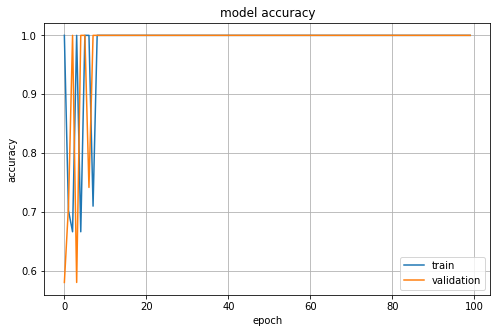

In [ ]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()